In [6]:
import pandas as pd
import numpy as np

In [7]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/Project 7th sem'
dir_list = os.listdir(path) 
dir_list

['4',
 '1',
 '3',
 '2',
 '5',
 '7',
 '6',
 'test1',
 'test3',
 'test2',
 'test4',
 'test5',
 'test6',
 'test7']

In [9]:
import cv2

In [10]:
x_data = []
y_data = []
for i in dir_list:
  if 'test' in i:
    continue
  for img in os.listdir(path+'/'+i):
    img = cv2.imread(path + '/' + i + '/' + img)
    img = cv2.resize(img, (96, 96))
    x_data.append(img)
    if i in '67':
      curr_y = 0
    else:
      curr_y = 1
    y_data.append(curr_y)
print(len(x_data))
print(len(y_data))

4619
4619


In [11]:
x_test_data = []
y_test_data = []
for i in dir_list:
  if 'test' in i:
    for img in os.listdir(path+'/'+i):
      img = cv2.imread(path + '/' + i + '/' + img)
      img = cv2.resize(img, (96, 96))
      x_test_data.append(img)
      if i in '67':
        curr_y = 0
      else:
        curr_y = 1
      y_test_data.append(curr_y)
print(len(x_test_data))

779


In [12]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_test_data = np.array(x_test_data)
y_test_data = np.array(y_test_data)

In [13]:
import matplotlib.pyplot as plt

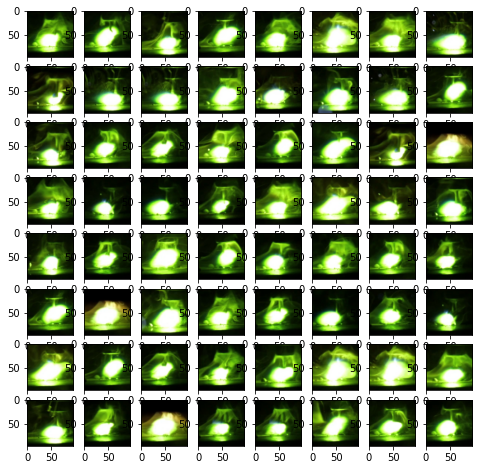

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)        # Subplot
    ax.imshow(x_data[i],cmap = plt.cm.bone)
plt.show()

In [15]:
x_data.shape, y_data.shape

((4619, 96, 96, 3), (4619,))

In [16]:
x_data = x_data / 255.0
x_test_data = x_test_data / 255.0

In [17]:
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [18]:
x_train, x_test_val, y_train, y_test_val = train_test_split(x_data, y_data, random_state=10)
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(3464, 96, 96, 3) (3464,)
(866, 96, 96, 3) (866,)
(289, 96, 96, 3) (289,)


In [19]:
base_model = VGG16(input_shape=(96,96,3), include_top=False, weights='imagenet')
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

In [20]:
for layer in base_model.layers:
    layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [21]:
model = Sequential()
model.add(Input(shape=(96,96,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dropout (Dropout)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 15,894,849
Trainable params: 8,259,585
Non

In [24]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
109/109 [==============================] - 462s 4s/step - loss: 0.4082 - accuracy: 0.9457 - val_loss: 0.0778 - val_accuracy: 0.9654
Epoch 2/5
109/109 [==============================] - 455s 4s/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.0093 - val_accuracy: 0.9965
Epoch 3/5
109/109 [==============================] - 464s 4s/step - loss: 0.0739 - accuracy: 0.9887 - val_loss: 0.0317 - val_accuracy: 0.9965
Epoch 4/5
109/109 [==============================] - 461s 4s/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 0.0102 - val_accuracy: 0.9965
Epoch 5/5
109/109 [==============================] - 458s 4s/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0074 - val_accuracy: 0.9965


In [25]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 82s 3s/step - loss: 0.0040 - accuracy: 0.9988


[0.004001880995929241, 0.9988452792167664]

In [26]:
model.evaluate(x_test_data, y_test_data)

25/25 [==============================] - 75s 3s/step - loss: 10.9598 - accuracy: 0.6958


[10.95975112915039, 0.6957638263702393]